#### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [4]:
import numpy as np
maximum_temp=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
minimum_temp=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [5]:
import matplotlib.pyplot as plt

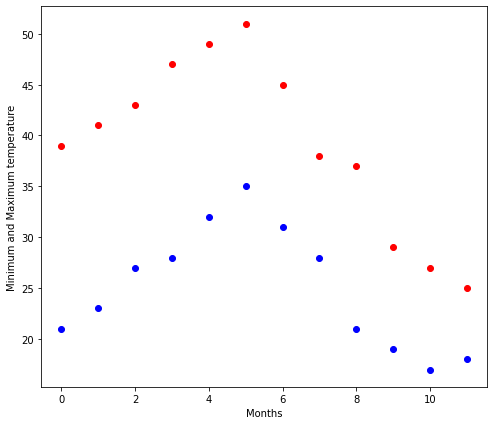

In [15]:
months=np.arange(12)
plt.figure(figsize=(8,7))
plt.plot(months,maximum_temp,'ro')
plt.plot(months,minimum_temp,'bo')
plt.xlabel('Months')
plt.ylabel('Minimum and Maximum temperature')
plt.show()

#### Fitting it to the periodic function

In [16]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, maximum_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, minimum_temp, [-40, 20, 0])

#### plotting 

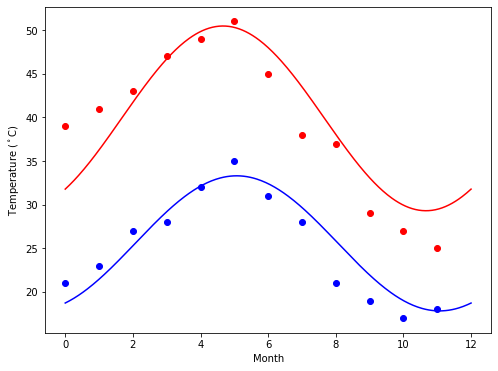

In [18]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(months, maximum_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, minimum_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

#### This assignment is for visualization using matplotlib:
Data to use: https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

In [19]:
import pandas as pd

In [21]:
titanic_url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic=pd.read_csv(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Create a pie chart presenting the male/female proportion

In [39]:
gen=titanic['sex'].astype('category').cat.codes

In [40]:
lb=titanic['sex'].unique()

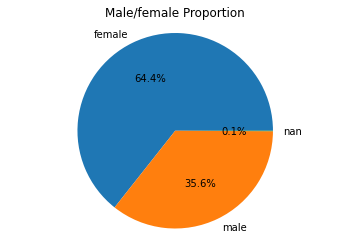

In [41]:
plt.pie(x=gen.value_counts(),labels=lb,autopct="%1.1f%%")
plt.title('Male/female Proportion')
plt.axis('equal')
plt.show()

#### Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

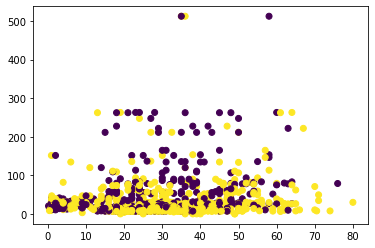

In [42]:
plt.scatter(titanic['age'],titanic['fare'],c=gen)
plt.show()